In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft
from scipy.fft import fftshift

## 1. Find the Fourier series associated with the function

                  f(x) = 0,     −π ≤ x < 0
                         π − x,  0 ≤ x ≤ π                             ................(1)
Write a function to determine the coefficients a0, an, and bn. Plot the magnitude of the coefficients with |an| in blue colour and |bn| in red colour.

In [6]:
def func_(x):
    f = np.pi - x
    return f

In [7]:
def a0(x,lower,upper):
    T = 2*(upper - lower)
    fn = func_(x)/T
    return fn

In [8]:
def integrate_a0(lower,upper):
    integration = quad(a0,lower,upper,args=(lower,upper))
    return integration[0]

In [9]:
def an(x,n,lower,upper):
    T = 2*(upper - lower)
    fn = 2*(func_(x))*np.cos(2*np.pi*n*x/(2*T))/T
    return fn

In [10]:
def integrate_an(n,lower,upper):
    integration = quad(an,lower,upper,args=(n,lower,upper))
    return integration[0]

In [11]:
def bn(x,n,lower,upper):
    T = 2*(upper - lower)
    fn = 2*(func_(x))*np.sin(2*np.pi*n*x/(2*T))/T
    return fn

In [12]:
def integrate_bn(n,lower,upper):
    integration = quad(bn,lower,upper,args=(n,lower,upper))
    return integration[0]

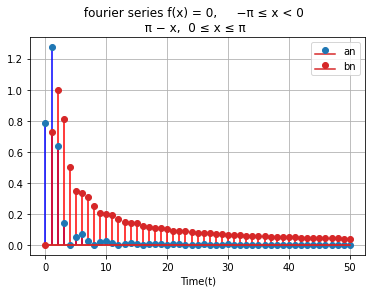

In [13]:
n = np.arange(0,51,1)
lower = 0
upper = np.pi
An = []
for i in n:
    if i == 0:
        An.append(integrate_a0(lower,upper))
    else:
        An.append(integrate_an(i,lower,upper))
magnitude_an = np.absolute(An)
plt.stem(n,magnitude_an,linefmt='blue',label='an')

Bn = []
for i in n:
    Bn.append(integrate_bn(i,lower,upper))
magnitude_bn = np.absolute(Bn)
plt.stem(n,magnitude_bn,linefmt='red', markerfmt='C3o',label='bn')
plt.xlabel('Time(t)')
plt.title(' fourier series f(x) = 0,     −π ≤ x < 0   \n  π − x,  0 ≤ x ≤ π   ')
plt.grid()
plt.legend()

# 2. The saw-tooth wave f

(a) For the saw-tooth wave f, compute the Fourier series on the interval [-1,1]. Plot the magnitude of the coefficients.

In [14]:
def sawtooth_fr_ao(x,lower,upper):
    T = upper - lower
    if x>=-1 and x<0:
        fn = ((2*x)+1)/T
    elif x>=0 and x<=1:
        fn = ((-2*x)+1)/T
    else:
        fn = 0
    return fn

In [15]:
def Integration_sawt_a0(lower,upper):
    I = quad(sawtooth_fr_ao,lower,upper,args=(lower,upper))
    return I[0]

In [16]:
def sawtooth_fr_an(x,n,lower,upper):
    T = upper - lower
    if x>=-1 and x<0:
        fn = 2*((2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        fn = 2*((-2*x)+1)*np.cos(2*np.pi*n*x/T)/T
    else:
        fn = 0
    return fn

In [17]:
def Integration_sawt_an(n,lower,upper):
    I = quad(sawtooth_fr_an,lower,upper,args=(n,lower,upper))
    return I[0]

In [18]:
def sawtooth_fr_bn(x,n,lower,upper):
    T = upper - lower
    if x>=-1 and x<0:
        fn = 2*((2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    elif x>=0 and x<=1:
        fn = 2*((-2*x)+1)*np.sin(2*np.pi*n*x/T)/T
    else:
        fn = 0
    return fn

In [19]:
def Integration_sawt_bn(n,lower,upper):
    I = quad(sawtooth_fr_bn,lower,upper,args=(n,lower,upper))
    return I[0]

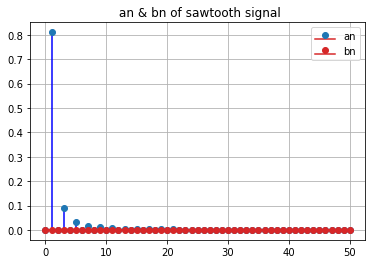

In [20]:
n = np.arange(0,51,1)
lower = -1
upper = 1

sawtooth_An = []
for i in n:
    if i == 0:
        sawtooth_An.append(Integration_sawt_a0(lower,upper))
    else:
        sawtooth_An.append(Integration_sawt_an(i,lower,upper))
sawtooth_An_abs = np.absolute(sawtooth_An)
plt.stem(n,sawtooth_An_abs,linefmt='blue', markerfmt='C0o',label='an')



sawtooth_Bn = []
for i in n:
    sawtooth_Bn.append(Integration_sawt_bn(i,lower,upper))
sawtooth_Bn_abs = np.absolute(sawtooth_Bn)
plt.stem(n,sawtooth_Bn_abs,linefmt='red', markerfmt='C3o',label='bn')
plt.title(' an & bn of sawtooth signal')
plt.legend()
plt.grid()

# (b) For the Fourier series expression in (a),
plot the partial sum of order 3 with red colour and the original saw-tooth wave f with blue colour. Compare the results on the same plot.



In [21]:
def fourier_series_sawtooth(x,n,lower,upper):
    T = upper - lower
    partial_sum = 0
    for i in range(0,n+1):
        if i==0:
            partial_sum+=sawtooth_An[i]/2
        else:
            partial_sum+=((sawtooth_An[i]*np.cos(2*np.pi*i*x/T))+(sawtooth_Bn[i]*np.sin(2*np.pi*i*x/T)))
    return partial_sum

In [22]:
def sawtooth_sgn(x):
    fn = []
    for i in x:
        if i>=-1 and i<0:
            fn.append((2*i)+1)
        elif i>=0 and i<=1:
            fn.append((-2*i)+1)
        else:
            fn.append(0)
    return fn

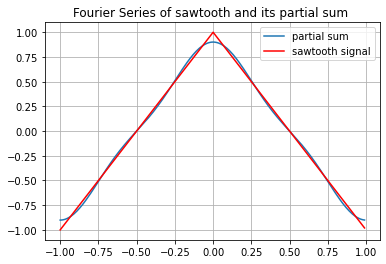

In [23]:
n = 3
lower = -1
upper = 1
x = np.arange(lower,upper,0.01)
output = fourier_series_sawtooth(x,n,lower,upper)
plt.plot(x,output,label='partial sum')
plt.plot(x,sawtooth_sgn(x),'r', label = 'sawtooth signal')
plt.title('Fourier Series of sawtooth and its partial sum ')
plt.legend()
plt.grid()

**As we keep on increasing the number of samples in partial sum then it starts replicating the original signal**

### (c) Plot the partial sum of order 9 for the saw-tooth function with green colour and the original saw-tooth wave f with blue colour. The plots obtained for (b) and (c) must be shown in different subplotsand you should be able to explain your observation.

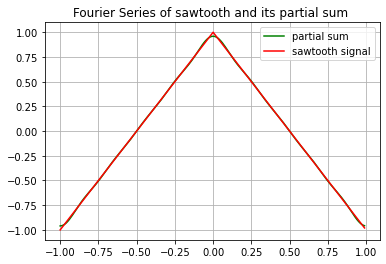

In [24]:
n = 9
lower = -1
upper = 1
x = np.arange(lower,upper,0.01)
output = fourier_series_sawtooth(x,n,lower,upper)
plt.plot(x,output,'g',label='partial sum')
plt.plot(x,sawtooth_sgn(x),'r', label = 'sawtooth signal')
plt.title('Fourier Series of sawtooth and its partial sum ')
plt.legend()
plt.grid()

**As we are increasing the sample size it starts getting closer to actual function**

### 3--> The Fourier transform is given by

                         X(ω) = ∫ x(t) e−jωt dt             ...................(2)
Write your custom function which takes input from the below given signals and computes the magnitude and phase spectra (a > 0). Sketch x(t), |X(ω)|, and ∠X(ω) when A = 2 and a = 4.

(a)

                     x(t) = A*e-at,  t ≥ 0
                            0,       t < 0                             ................(3)

In [25]:
def x1(t):
    fn = []
    for i in t:
        if i>=0:
            fn.append(A*np.exp(-a*i))
        else:
            fn.append(0)
    return fn


In [26]:
def x1_real(t,A,a,omega):
    if (t>0):
        return A*np.exp(-a*t)*np.cos(omega*t)
    else:
        return 0

In [27]:
def x1_real_integration(A,a,omega,lower,upper):
    I = quad(x1_real,lower,upper,args=(A,a,omega))
    return I[0]

In [28]:
def x1_imag(t,A,a,omega):
    if (t>0):
        return A*np.exp(-a*t)*np.sin(omega*t)
    else:
        return 0

In [29]:
def x1_imag_integration(A,a,omega,lower,upper):
    I = quad(x1_imag,lower,upper,args=(A,a,omega))
    return I[0]

In [30]:
A = 2
a = 4
lower = 0
upper = np.inf
omega = np.arange(-40,40,0.01)
x1_Real = []
x1_Imag = []
for i in omega:
    x1_Real.append(x1_real_integration(A,a,i,lower,upper))
    x1_Imag.append(x1_imag_integration(A,a,i,lower,upper))

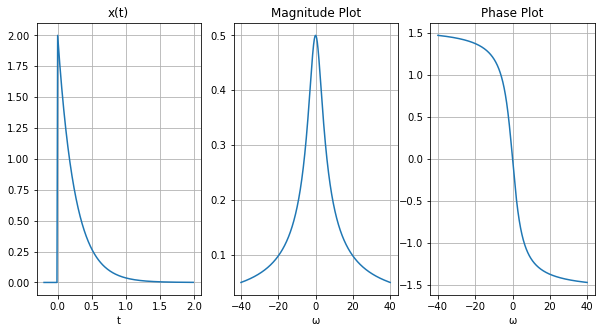

In [31]:
fig, axes = plt.subplots(1,3,figsize=(10,5))

t = np.arange(-0.2,2,0.01)
X1 = x1(t)
axes[0].plot(t,X1)
axes[0].set_xlabel('t')
axes[0].set_title('x(t)')
axes[0].grid()


x1_mag = np.absolute((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[1].plot(omega,x1_mag)
axes[1].set_xlabel('ω')
axes[1].set_title('Magnitude Plot')
axes[1].grid()


x1_phase = np.angle((np.array(x1_Real)) - 1j*(np.array(x1_Imag)))
axes[2].plot(omega,x1_phase)
axes[2].set_xlabel('ω')
axes[2].set_title('Phase Plot')
axes[2].grid()

# 3.(b) 
x(t) = Ae^-a|t|

In [32]:
def x2(t):
    f = []
    for i in t:
        f.append(A*np.exp(-a*abs(i)))
    return f

In [33]:
def x2_real(t,A,a,omega):
    f = A*np.exp(-a*abs(t))*np.cos(omega*t)
    return f

In [34]:
def x2_real_integration(A,a,omega,lower,upper):
    I = quad(x2_real,lower,upper,args=(A,a,omega))
    return I[0]

In [35]:
def x2_imag(t,A,a,omega):
    f = A*np.exp(-a*abs(t))*np.sin(omega*t)
    return f

In [38]:
def x2_imag_integration(A,a,omega,lower,upper):
    I = quad(x2_imag,lower,upper,args=(A,a,omega))
    return I[0]

In [39]:
A = 2
a = 4
lower = -np.inf
upper = np.inf
omega = np.arange(-10,10,0.01)
x2_Real = []
x2_Imag = []
for i in omega:
    x2_Real.append(x2_real_integration(A,a,i,lower,upper))
    x2_Imag.append(x2_imag_integration(A,a,i,lower,upper))

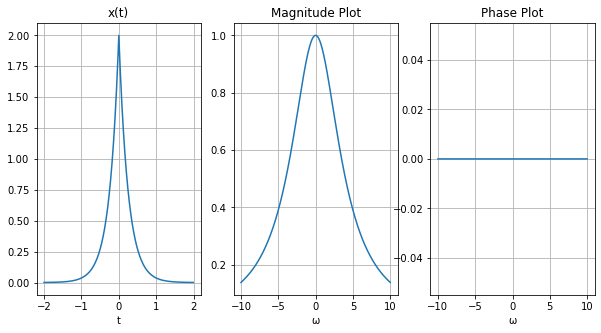

In [40]:
fig, axes = plt.subplots(1,3,figsize=(10,5))

t = np.arange(-2,2,0.01)
X2 = x2(t)
axes[0].plot(t,X2)
axes[0].set_xlabel('t')
axes[0].set_title('x(t)')
axes[0].grid()


x2_mag = np.absolute((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[1].plot(omega,x2_mag)
axes[1].set_xlabel('ω')
axes[1].set_title('Magnitude Plot')
axes[1].grid()


x2_phase = np.angle((np.array(x2_Real)) - 1j*(np.array(x2_Imag)))
axes[2].plot(omega,x2_phase)
axes[2].set_xlabel('ω')
axes[2].set_title('Phase Plot')
axes[2].grid()

### 4--> Determine and sketch XR(ω), XI (ω), |X(ω)|, and ∠X(ω) for the Fourier transform:

                          X(ω) = 1/(1 − ae−jω) , −1 ≤ a ≤ 1       .................(5)
Show the graphical representation of the spectra for a = 0.8

In [41]:
def X_omega(a,omega):
    fn = 1/(1 -(a*np.exp(-1j*omega)))
    return fn

In [42]:
a = 0.8
omega = np.arange(-5,5,0.01)
X = X_omega(a,omega)

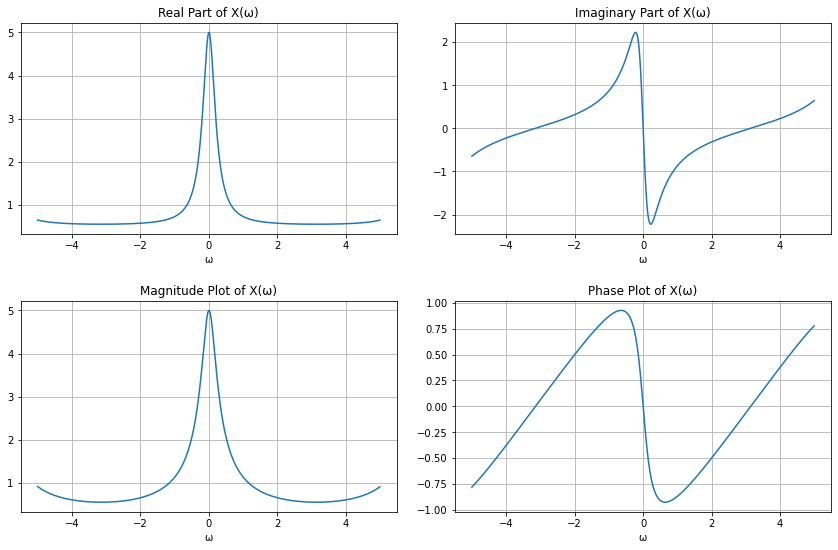

In [43]:
fig,axes = plt.subplots(2,2,figsize=(12,8))

X_omega_R = X.real # it gives real values
axes[0,0].plot(omega,X_omega_R)
axes[0,0].set_xlabel('ω')
axes[0,0].set_title('Real Part of X(ω)')
axes[0,0].grid()


X_omega_Img = X.imag # it gives imaginary values
axes[0,1].plot(omega,X_omega_Img)
axes[0,1].set_xlabel('ω')
axes[0,1].set_title('Imaginary Part of X(ω)')
axes[0,1].grid()


X_omega_mag = np.absolute(X) # for magnitude
axes[1,0].plot(omega,X_omega_mag)
axes[1,0].set_xlabel('ω')
axes[1,0].set_title('Magnitude Plot of X(ω)')
axes[1,0].grid()


X_omega_phase = np.angle(X) # for phase calculation
axes[1,1].plot(omega,X_omega_phase)
axes[1,1].set_xlabel('ω')
axes[1,1].set_title('Phase Plot of X(ω)')
axes[1,1].grid()

plt.tight_layout(pad=2)

# 5--> Determine the Fourier transform of the signal:

                                   x(n) = a^|n|                         
Plot x(n) and X(ω) with a = 0.6.

In [44]:
def x_n(a,n):
    fn = a**(abs(n))
    return fn

In [45]:
def x_omega(a,lower,upper,omega):
    dtft = 0
    for i in range(lower,upper,1):
        dtft+=(a**(abs(i)))*(np.exp(-1j*omega*i))
    return dtft

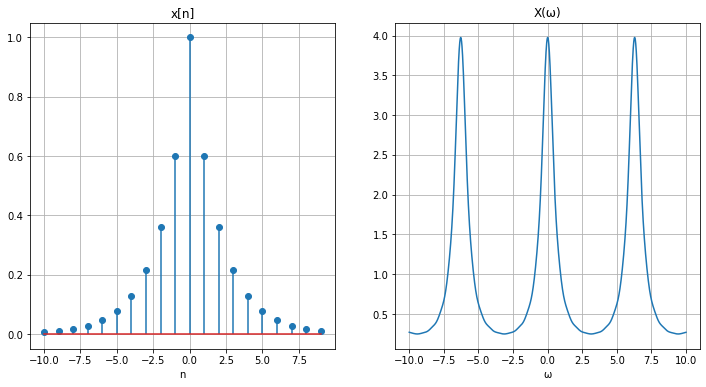

In [46]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
a = 0.6
lower = -10
upper = 10

n = np.arange(lower,upper,1)
output = x_n(a,n)
axes[0].stem(n,output)
axes[0].set_xlabel('n')
axes[0].set_title('x[n]')
axes[0].grid()


omega = np.arange(lower,upper,0.01)
output = x_omega(a,lower,upper,omega)
output_magnitutde = np.absolute(output)
axes[1].plot(omega,output_magnitutde)
axes[1].set_xlabel('ω')
axes[1].set_title('X(ω)')
axes[1].grid()

# 6 (a) 
Generate 3 sine waves with frequencies 2 Hz, 5 Hz, and 8 Hz, having amplitudes of 3, 2, and 1, respectively, and all phases as zeros. Add the 3 sine waves together with a sampling rate fs = 100 Hz. Plot the resultant signal for a time duration of 1 sec.

In [50]:
def sine(amp,freq,t):
    fn = a*np.sin(2*np.pi*f*t)
    return fn


In [52]:
f = 100
t = np.arange(0,1,0.01)
amp1 = 3
freq1 = 2
x1 = sine(amp1,freq1,t)

In [54]:
amp2 = 2
freq2 = 5
x2 = sine(amp2,freq2,t)

In [55]:
amp3 = 1
freq3 = 8
x3 = sine(amp3,freq3,t)

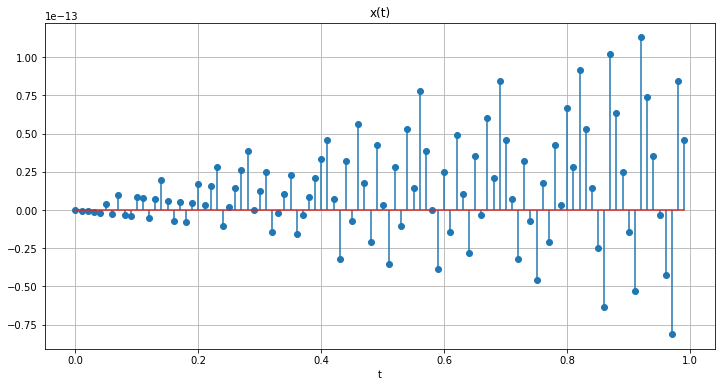

In [56]:
plt.subplots(figsize=(12,6))
x = x1 + x2 + x3
plt.stem(t,x)
plt.xlabel('t')
plt.title('x(t)')
plt.grid()

# 6 (b)
Write a function for discrete Fourier transform (DFT) as DFT(x) which takes in an input argument x, which is a 1-dimensional realvalued signal. The function has to calculate the DFT of the signal and return the DFT values. Apply this function to the signal generated in (a) and plot the result. Verify that the output of the DFT is symmetric.

In [57]:
def DFT(x):
    N = len(x)
    output = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        output.append(dft)
    return output

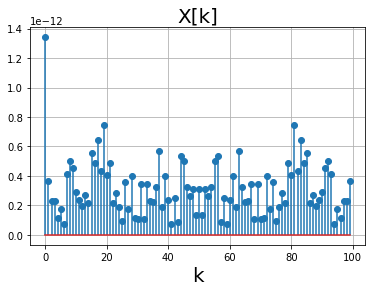

In [58]:
y = DFT(x)                  # x = x1 + x2 + x3
K = np.arange(0,len(y),1)
y_abs = np.absolute(y)
plt.stem(K,y_abs)
plt.xlabel('k',fontsize=20)
plt.title('X[k]',fontsize=20)
plt.grid()

# 6.(c)

In [59]:
def Filter(x,fs):
    fil = [] 
    for i in range(len(x)):
        if i<fs:
            fil.append(x[i])
    return fil

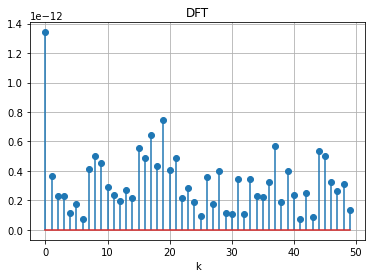

In [60]:
t1 = np.arange(0,50,1)
output = Filter(y_abs,100/2)
plt.stem(t1,output)
plt.xlabel('k')
plt.title('DFT')

plt.grid()

# 7
### (a) Generate a sinewave of 100 Hz for 1 sec duration. Choose sampling rate, fs = 200 Hz.
### (b) Find its true spectrum.
### (c) Generate rectangular windows of length 80 and 160 samples.
### (d) Plot the two window functions in time and frequency domains. Note down your observations about main lobe, side lobe, and other factors which you may observe.
### (e) Multiply sinewave using rectangular window of duration 80 sam- ples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b)
### (f) Multiply sinewave using rectangular window of duration 160 sam- ples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b)

# 7.(a)

In [61]:
def sine(a,f,n,fs):
    fn = a*np.sin(2*np.pi*f*n/fs)
    return fn

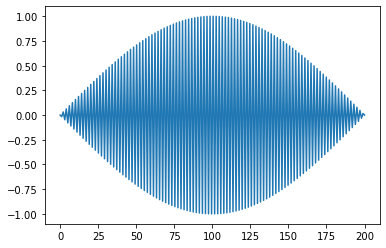

In [62]:
a = 1
f = 100
fs = 200
n = np.linspace(0,fs,200)
s = sine(a,f,n,fs)
plt.plot(n,s)

# 7.(b)

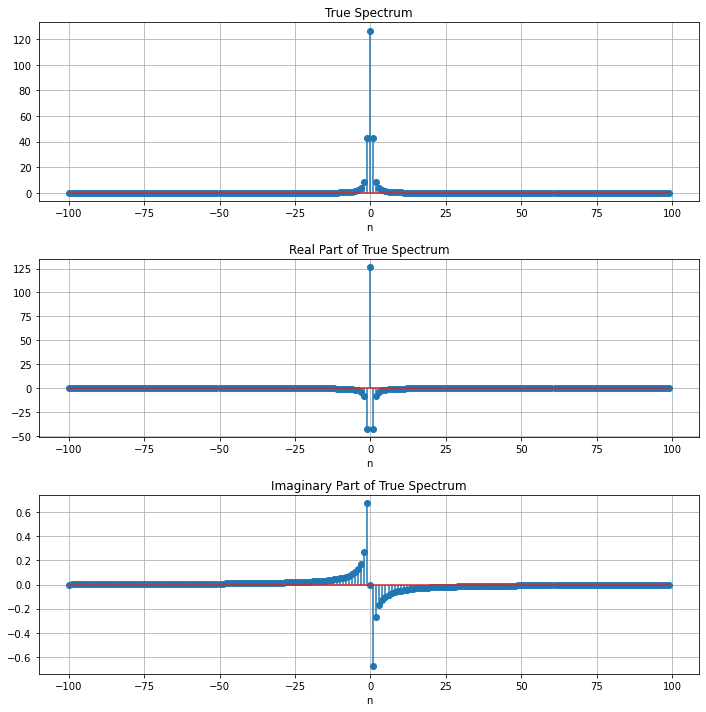

In [63]:
fig, axes = plt.subplots(3,1,figsize=(10,10))

n1 = np.arange(-100,100,1)
true_spectrum = DFT(s)
      
axes[0].stem(n1,np.abs(true_spectrum))
axes[0].set_xlabel('n')
axes[0].set_title('True Spectrum')
axes[0].grid()

axes[1].stem(n1,np.array(true_spectrum).real)
axes[1].set_xlabel('n')
axes[1].set_title('Real Part of True Spectrum')
axes[1].grid()

axes[2].stem(n1,np.array(true_spectrum).imag)
axes[2].set_xlabel('n')
axes[2].set_title('Imaginary Part of True Spectrum')
axes[2].grid()

plt.tight_layout()

# 7. (c)

In [70]:
def window_seq(a,n,T):
    rect =[]
    for sample in n:
        if sample < -T/2:
            rect.append(0)
        elif sample > T/2:
            rect.append(0)
        else:
            rect.append(a)
    return rect

# 7. (d)

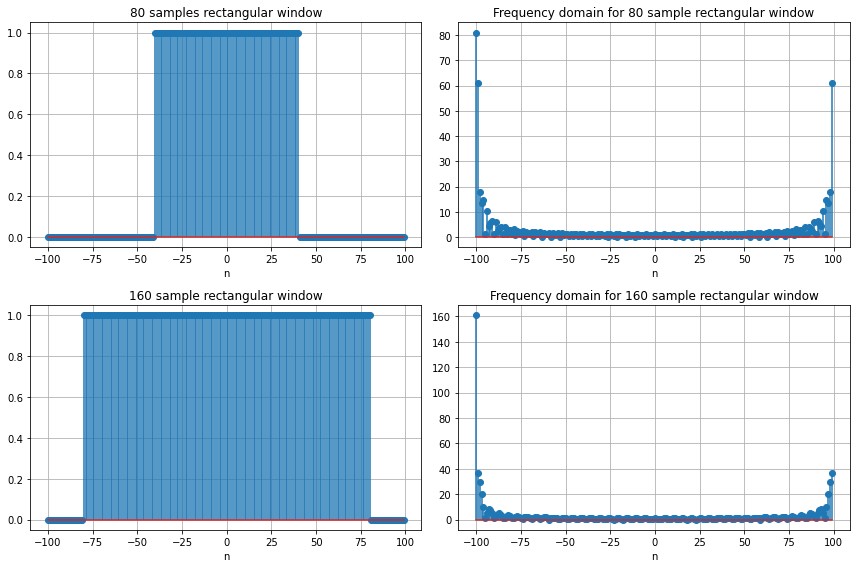

In [71]:
fig, axes =plt.subplots(2,2,figsize=(12,8)) 

a = 1
T = 80
w1 = window_seq(a,n1,T)
axes[0,0].stem(n1,w1) 
axes[0,0].set_xlabel('n')
axes[0,0].set_title('80 samples rectangular window')
axes[0,0].grid()


w1_dtft = DFT(w1)
axes[0,1].stem(n1,np.absolute(w1_dtft))
axes[0,1].set_xlabel('n')
axes[0,1].set_title('Frequency domain for 80 sample rectangular window')
axes[0,1].grid()


a = 1

T = 160
w2 = window_seq(a,n1,T)
axes[1,0].stem(n1,w2)
axes[1,0].set_xlabel('n')
axes[1,0].set_title('160 sample rectangular window')
axes[1,0].grid()


w2_dtft = DFT(w2)
axes[1,1].stem(n1,np.abs(w2_dtft))
axes[1,1].set_xlabel('n')
axes[1,1].set_title('Frequency domain for 160 sample rectangular window')
axes[1,1].grid()

plt.tight_layout()

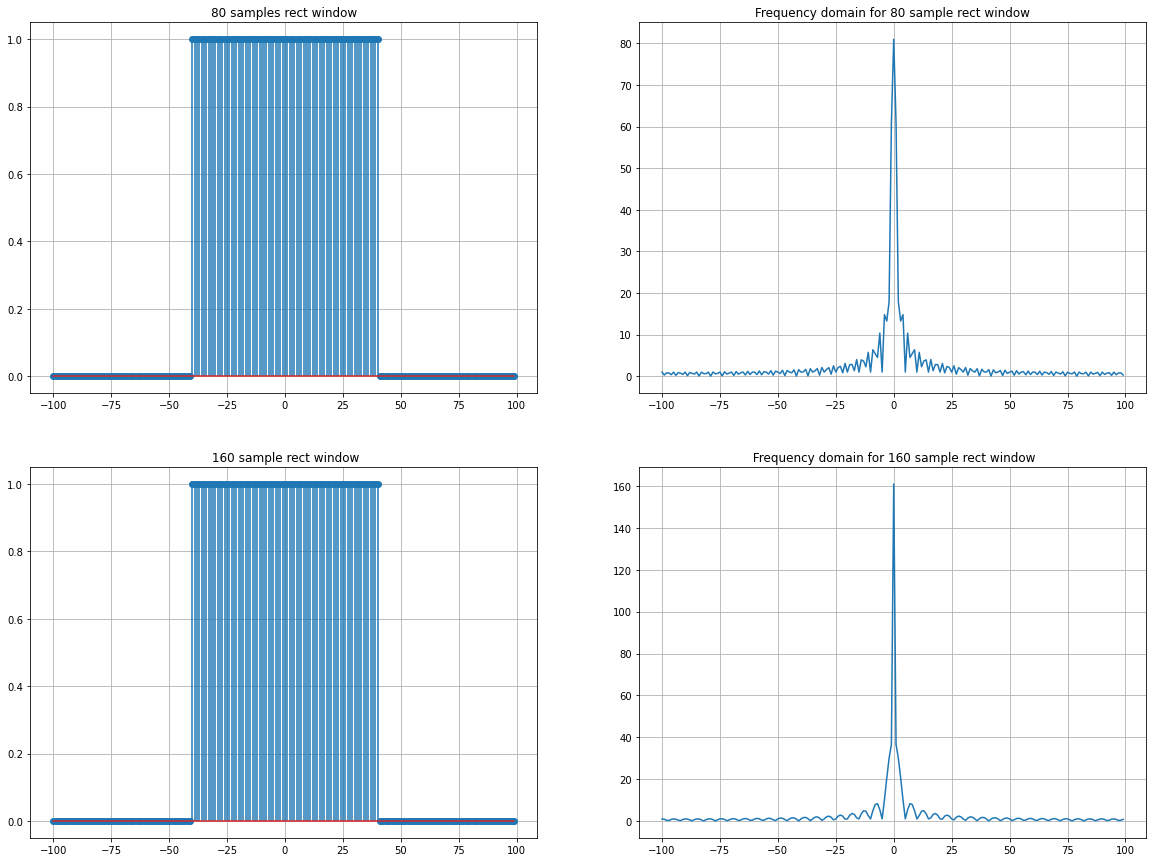

In [78]:
fft1=fftshift(np.abs(fft(w1)))
fft2=fftshift(np.abs(fft(w2)))
fig, ax=plt.subplots(2,2,figsize=(20,15))        
ax[0][0].stem(n1,w1) 
ax[0][0].set_title("80 samples rect window")
ax[0][0].grid()
ax[0][1].plot(n1,fft1) 
ax[0][1].set_title("Frequency domain for 80 sample rect window")
ax[0][1].grid()
ax[1][0].stem(n1,w1) 
ax[1][0].set_title(" 160 sample rect window")
ax[1][0].grid()
ax[1][1].plot(n1,fft2) 
ax[1][1].set_title(" Frequency domain for 160 sample rect window")
ax[1][1].grid()

# 7. (e)

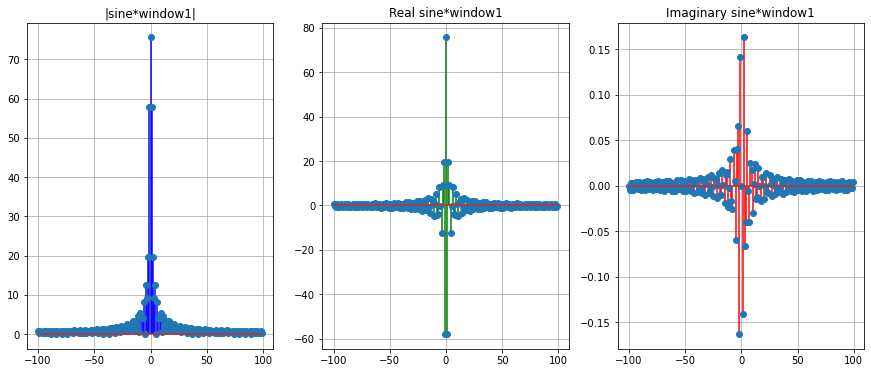

In [81]:
v=s*w1
fig, ax=plt.subplots(1,3,figsize=(15,6))        
ax[0].stem(n1,np.abs(DFT(v)),'b') 
ax[0].set_title("|sine*window1|")
ax[0].grid()
ax[1].stem(n1,(fft(v)).real,'g') 
ax[1].set_title("Real sine*window1")
ax[1].grid()
ax[2].stem(n1,(fft(v)).imag,'r') 
ax[2].set_title("Imaginary sine*window1")
ax[2].grid()


# 7. (f)

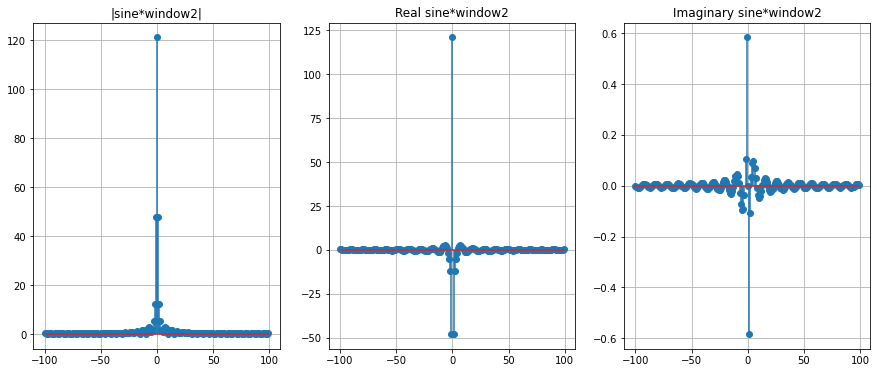

In [84]:
v=s*w2
fig, ax=plt.subplots(1,3,figsize=(15,6))        
ax[0].stem(n1,np.abs(DFT(v))) 
ax[0].set_title("|sine*window2|")
ax[0].grid()
ax[1].stem(n1,(np.real(DFT(v)))) 
ax[1].set_title("Real sine*window2")
ax[1].grid()
ax[2].stem(n1,(np.imag(DFT(v)))) 
ax[2].set_title("Imaginary sine*window2")
ax[2].grid()
